In [1]:
import kaggle

In [2]:
!kaggle datasets download ahsan81/superstore-marketing-campaign-dataset -f superstore_data.csv

Dataset URL: https://www.kaggle.com/datasets/ahsan81/superstore-marketing-campaign-dataset
License(s): CC0-1.0
superstore_data.csv: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
 #Downloading the Dataset from Kaggle is down 

In [4]:
# Now we load the Dataset with PANDAS

In [3]:
import pandas as pd

In [6]:
filepath = "C:\\Users\\sahir\\Desktop\\Sales\\superstore_data.csv"
df = pd.read_csv(filepath)

In [7]:
df.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

In [8]:
df.head(20)

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0
5,7348,1958,PhD,Single,71691.0,0,0,3/17/2014,0,336,...,240,32,43,1,4,7,5,2,1,0
6,4073,1954,2n Cycle,Married,63564.0,0,0,1/29/2014,0,769,...,15,34,65,1,10,10,7,6,1,0
7,1991,1967,Graduation,Together,44931.0,0,1,1/18/2014,0,78,...,0,0,7,1,2,1,3,5,0,0
8,4047,1954,PhD,Married,65324.0,0,1,11/1/2014,0,384,...,21,32,5,3,6,2,9,4,0,0
9,9477,1954,PhD,Married,65324.0,0,1,11/1/2014,0,384,...,21,32,5,3,6,2,9,4,0,0


In [9]:
df.columns = df.columns.str.replace('Mnt','Amount_for_')
df.columns = df.columns.str.replace('Products','_Products')
df.columns = df.columns.str.replace('Num','Num_of_')
df.columns = df.columns.str.replace('Purchases','_Purchase')
df.columns = df.columns.str.replace('Prods','_Products')
df.columns = df.columns.str.replace('Web','Web_')
df.columns = df.columns.str.replace('home','_home')

In [10]:
df.columns=df.columns.str.lower()
df.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kid_home',
       'teen_home', 'dt_customer', 'recency', 'amount_for_wines',
       'amount_for_fruits', 'amount_for_meat_products',
       'amount_for_fish_products', 'amount_for_sweet_products',
       'amount_for_gold_products', 'num_of_deals_purchase',
       'num_of_web__purchase', 'num_of_catalog_purchase',
       'num_of_store_purchase', 'num_of_web_visitsmonth', 'response',
       'complain'],
      dtype='object')

In [11]:
df['income'].fillna(df['income'].mean(), inplace=True)

In [14]:
df['household_size'] = df['kid_home'] + df['teen_home']

In [15]:
df['total_amount_spent'] = (
    df['amount_for_wines'] + df['amount_for_fruits'] +
    df['amount_for_meat_products'] + df['amount_for_fish_products'] +
    df['amount_for_sweet_products'] + df['amount_for_gold_products']
)

In [16]:
df['age'] = 2024 - df['year_birth']

In [17]:
df['income_to_spending_ratio'] = (df['total_amount_spent'] / df['income']) * 100

In [18]:
df.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kid_home',
       'teen_home', 'dt_customer', 'recency', 'amount_for_wines',
       'amount_for_fruits', 'amount_for_meat_products',
       'amount_for_fish_products', 'amount_for_sweet_products',
       'amount_for_gold_products', 'num_of_deals_purchase',
       'num_of_web__purchase', 'num_of_catalog_purchase',
       'num_of_store_purchase', 'num_of_web_visitsmonth', 'response',
       'complain', 'household_size', 'total_amount_spent', 'age',
       'income_to_spending_ratio'],
      dtype='object')

In [19]:
df['dt_customer'] = pd.to_datetime(df['dt_customer'])

In [20]:
df.dtypes

id                                    int64
year_birth                            int64
education                            object
marital_status                       object
income                              float64
kid_home                              int64
teen_home                             int64
dt_customer                  datetime64[ns]
recency                               int64
amount_for_wines                      int64
amount_for_fruits                     int64
amount_for_meat_products              int64
amount_for_fish_products              int64
amount_for_sweet_products             int64
amount_for_gold_products              int64
num_of_deals_purchase                 int64
num_of_web__purchase                  int64
num_of_catalog_purchase               int64
num_of_store_purchase                 int64
num_of_web_visitsmonth                int64
response                              int64
complain                              int64
household_size                  

In [21]:
df.to_csv('cleaned_dataset_new.csv', index=False)

In [25]:
pip install mysqlclient


   ---------------------------------------- 0.0/207.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/207.5 kB ? eta -:--:--
   ----- --------------------------------- 30.7/207.5 kB 660.6 kB/s eta 0:00:01
   --------------------- ------------------ 112.6/207.5 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 207.5/207.5 kB 1.6 MB/s eta 0:00:00


In [28]:
pip install sqlalchemy pandas pyodbc

Note: you may need to restart the kernel to use updated packages.


In [5]:
from sqlalchemy import create_engine
import pandas as pd

server = 'SAHIRHUSSAIN\\SQLEXPRESS'  
database = 'Sales'          

connection_string = f'mssql+pyodbc://{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes'

engine = create_engine(connection_string)

In [6]:
conn= engine.connect()

In [32]:
df.to_sql('marketing_campaign', con=conn, if_exists='append', index=False)
print("Data appended successfully to 'marketing_campaign' table.")

Data appended successfully to 'marketing_campaign' table.


# Predictive model code

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

In [8]:
df= pd.read_sql("SELECT * FROM marketing_campaign", connection_string)

In [26]:
df = df.drop(columns=['dt_customer'])

In [27]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

categorical_cols = ['education', 'marital_status']

encoder = OneHotEncoder(sparse=False, drop='first')  
encoded_cols = pd.DataFrame(encoder.fit_transform(df[categorical_cols]), columns=encoder.get_feature_names_out())

df = df.drop(columns=categorical_cols).reset_index(drop=True)
df = pd.concat([df, encoded_cols], axis=1)

C:\Users\sahir\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [28]:
print(df.dtypes)

id                             int64
year_birth                     int64
income                       float64
kid_home                       int64
teen_home                      int64
recency                        int64
amount_for_wines               int64
amount_for_fruits              int64
amount_for_meat_products       int64
amount_for_fish_products       int64
amount_for_sweet_products      int64
amount_for_gold_products       int64
num_of_deals_purchase          int64
num_of_web__purchase           int64
num_of_catalog_purchase        int64
num_of_store_purchase          int64
num_of_web_visitsmonth         int64
response                       int64
complain                       int64
household_size                 int64
total_amount_spent             int64
age                            int64
income_to_spending_ratio     float64
education_Basic              float64
education_Graduation         float64
education_Master             float64
education_PhD                float64
m

In [29]:
X = df.drop(columns=['response', 'id'])  
y = df['response']  

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [32]:
model = LogisticRegression(random_state=42, max_iter=1000)

In [33]:
model.fit(X_train, y_train)

C:\Users\sahir\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [34]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

In [35]:
from sklearn.metrics import classification_report

print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       760
           1       0.55      0.25      0.34       136

    accuracy                           0.85       896
   macro avg       0.71      0.61      0.63       896
weighted avg       0.83      0.85      0.83       896



In [36]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[732  28]
 [102  34]]


In [37]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.7952012383900929


# Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=None, class_weight='balanced')
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [40]:
y_rf_pred = rf_model.predict(X_test)
y_rf_prob = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

In [41]:
from sklearn.metrics import classification_report

print("Random Forest Classification Report:\n", classification_report(y_test, y_rf_pred))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.92       760
           1       0.70      0.14      0.23       136

    accuracy                           0.86       896
   macro avg       0.78      0.56      0.58       896
weighted avg       0.84      0.86      0.82       896



In [42]:
from sklearn.metrics import confusion_matrix

rf_conf_matrix = confusion_matrix(y_test, y_rf_pred)
print("Random Forest Confusion Matrix:\n", rf_conf_matrix)

Random Forest Confusion Matrix:
 [[752   8]
 [117  19]]


In [43]:
from sklearn.metrics import roc_auc_score

rf_roc_auc = roc_auc_score(y_test, y_rf_prob)
print("Random Forest ROC-AUC Score:", rf_roc_auc)

Random Forest ROC-AUC Score: 0.8293246904024768


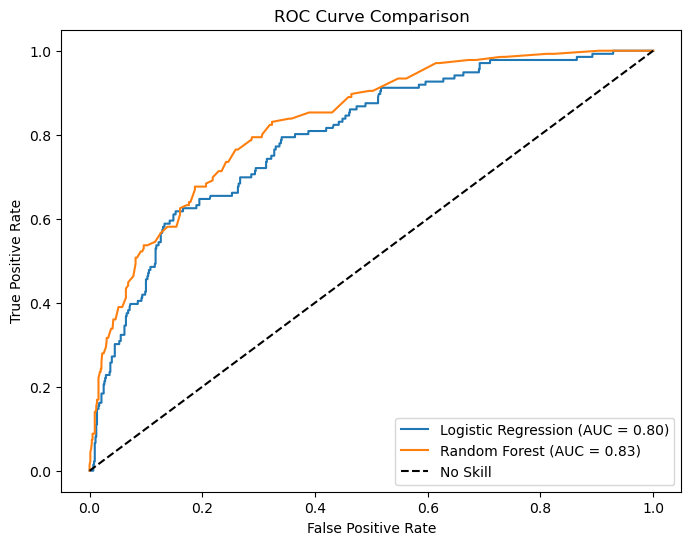

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

lr_fpr, lr_tpr, _ = roc_curve(y_test, y_prob)
lr_auc = auc(lr_fpr, lr_tpr)

rf_fpr, rf_tpr, _ = roc_curve(y_test, y_rf_prob)
rf_auc = auc(rf_fpr, rf_tpr)

plt.figure(figsize=(8, 6))
plt.plot(lr_fpr, lr_tpr, label=f"Logistic Regression (AUC = {lr_auc:.2f})")
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="No Skill")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.show()


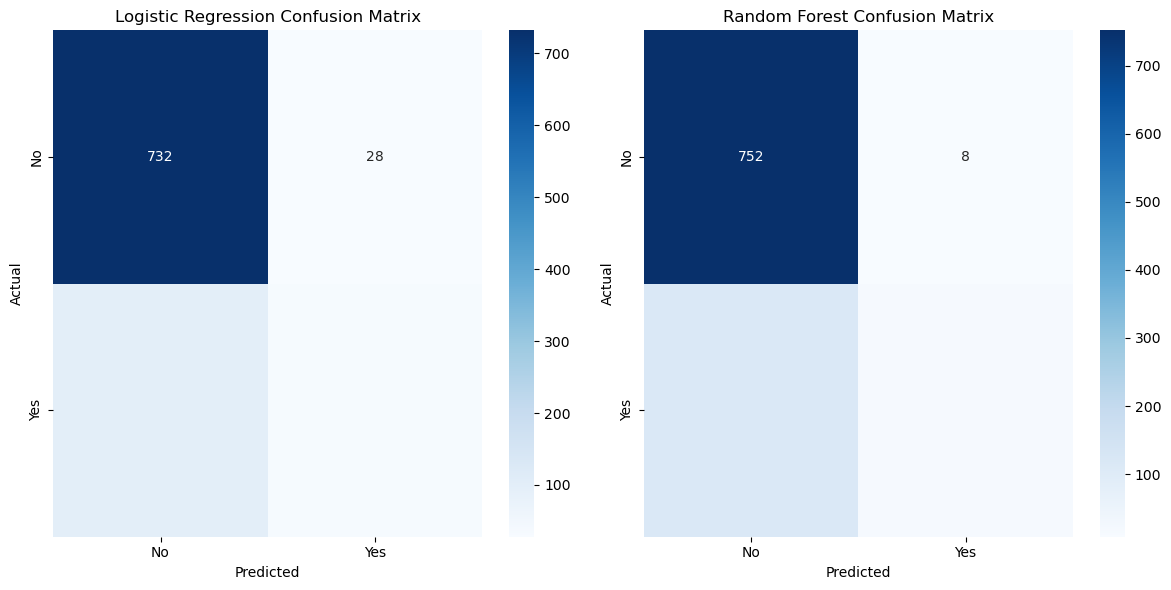

In [45]:
import seaborn as sns
import numpy as np

models = ["Logistic Regression", "Random Forest"]
conf_matrices = [conf_matrix, rf_conf_matrix]

plt.figure(figsize=(12, 6))
for i, matrix in enumerate(conf_matrices):
    plt.subplot(1, 2, i + 1)
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
    plt.title(f"{models[i]} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
plt.tight_layout()
plt.show()


# NEW

In [46]:
import numpy as np
import pandas as pd

new_example = {
    'year_birth': 1985,
    'income': 65000,
    'kid_home': 1,
    'teen_home': 0,
    'recency': 10,
    'amount_for_wines': 300,
    'amount_for_fruits': 20,
    'amount_for_meat_products': 200,
    'amount_for_fish_products': 50,
    'amount_for_sweet_products': 30,
    'amount_for_gold_products': 100,
    'num_of_deals_purchase': 5,
    'num_of_web__purchase': 3,
    'num_of_catalog_purchase': 2,
    'num_of_store_purchase': 4,
    'num_of_web_visitsmonth': 10,
    'complain': 0,
    'household_size': 2,
    'total_amount_spent': 700,
    'age': 38,
    'income_to_spending_ratio': 1.08,
    'education_Basic': 0,
    'education_Graduation': 1,
    'education_Master': 0,
    'education_PhD': 0,
    'marital_status_Alone': 0,
    'marital_status_Divorced': 0,
    'marital_status_Married': 1,
    'marital_status_Single': 0,
    'marital_status_Together': 0,
    'marital_status_Widow': 0,
    'marital_status_YOLO': 0
}

new_example_df = pd.DataFrame([new_example])

predicted_response = rf_model.predict(new_example_df)
predicted_probability = rf_model.predict_proba(new_example_df)

print("Predicted Response:", predicted_response[0]) 
print("Prediction Probability:", predicted_probability)

Predicted Response: 0
Prediction Probability: [[0.7 0.3]]
